## Evaluation of a learned BPE vocabulary

This notebook has an example of how to evaluate a learned BPE vocabulary of music words according to the metrics described on the paper.

The used code can be found inside the directories `src/fit` and `src/metrics` and the obtained results will be stored inside `results/test`.

------

For example, for the *Einsiedeln* vocabulary obtained on the `get-BPE-vocabulary.ipynb` notebook.

First we need to estimate a curve for the empirical data.

In [3]:
!gnuplot -e "datafile='../results/test/BPE_5-5_vocab_sorted.txt'" ../src/fit/fit.gnp
!cp fit.log "../results/test/BPE_5-5_WeightFit-0.3.log"
!rm fit.log

"../src/fit/fit.gnp" line 16: warning: 
	> Implied independent variable y not found in fit function.
	> Assuming version 4 syntax with zerror in column 3 but no zerror keyword.

iter      chisq       delta/lim  lambda   a             b             c            
   0 7.3673451349e+07   0.00e+00  1.10e+02    1.000000e+03   1.000000e+00   1.000000e+00
   * 9.2980259812e+07   2.08e+04  1.10e+03    1.280921e+04   7.113589e+00  -2.706425e-01
   * 1.8308607413e+09   9.60e+04  1.10e+04    3.098706e+03   1.497436e+00   1.430591e+00
   1 5.8179901935e+07  -2.66e+04  1.10e+03    1.062802e+03   9.972539e-01   1.191887e+00
   * 7.0168164222e+07   1.71e+04  1.10e+04    4.005666e+03   1.885493e+00   7.398513e-01
   2 5.4460491592e+07  -6.83e+03  1.10e+03    1.127412e+03   1.011902e+00   1.254327e+00
   * 7.2116167770e+07   2.45e+04  1.10e+04    4.047165e+03   1.702152e+00   7.145636e-01
   3 5.3309528140e+07  -2.16e+03  1.10e+03    1.189552e+03   1.039583e+00   1.239803e+00
   * 6.8376444130e+07   2.

Once we have an estimation we can visualize the estimation and empirical data together.

In [13]:
import subprocess

datafile = "../results/test/BPE_5-5_vocab_sorted.txt"
fitfile = "../results/test/BPE_5-5_WeightFit-0.3.log"
label = "o = 5  l = 5"

subprocess.run([
    "gnuplot",
    "-e",
    f"datafile1='{datafile}'; fitfile1='{fitfile}'; label1='{label}'",
    "../src/plot/plotZipfCurve.gnp"
], check=True, stdin=subprocess.DEVNULL)

!mv ZipfPlot.png ../results/test/ZipfPlot.png

We visualize the plot

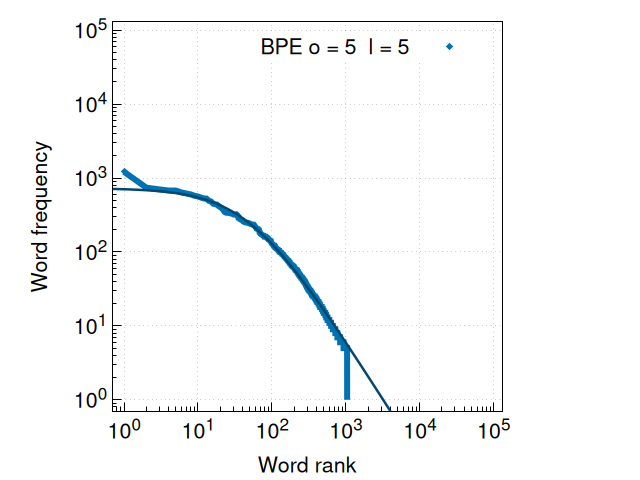

In [14]:
from IPython.display import display, Image

display(Image(filename='../results/test/ZipfPlot.png'))

Then, to compute the metrics we simply run the script. We need:

- Empirical data (our learned vocab.) = `../results/test/BPE_5-5_vocab_sorted.txt`

- Estimated parameters = `../results/test/BPE_5-5_WeightFit-0.3.log`


In [15]:
!python3 ../src/metrics/compute_metrics.py \
    -em "../results/test/BPE_5-5_vocab_sorted.txt" \
    -es "../results/test/BPE_5-5_WeightFit-0.3.log"

For file: BPE_5-5_vocab_sorted.txt
c = 3251.25 q = 49.8314 z = 1.57747
R2 = 0.9717491026107048
KS = 0.015380148365523927

